# Import libraries and dataset

In [1]:
!pip install bubbly
!pip install iplot
!pip install chart_studio


  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=9feef14dc9979524ed0f177d416d61896ae2f85ddbe393bc48a871fc7aaf0785
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly
ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,  normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [3]:
df = pd.read_csv('/content/happiness_report.csv')

In [4]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [5]:
df.shape

(156, 9)

In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
df[df['Country or region'] == "India"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


# Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [10]:
df[df["Score"] == 7.769000]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


# Data visualization - 1

<Figure size 1500x1000 with 0 Axes>

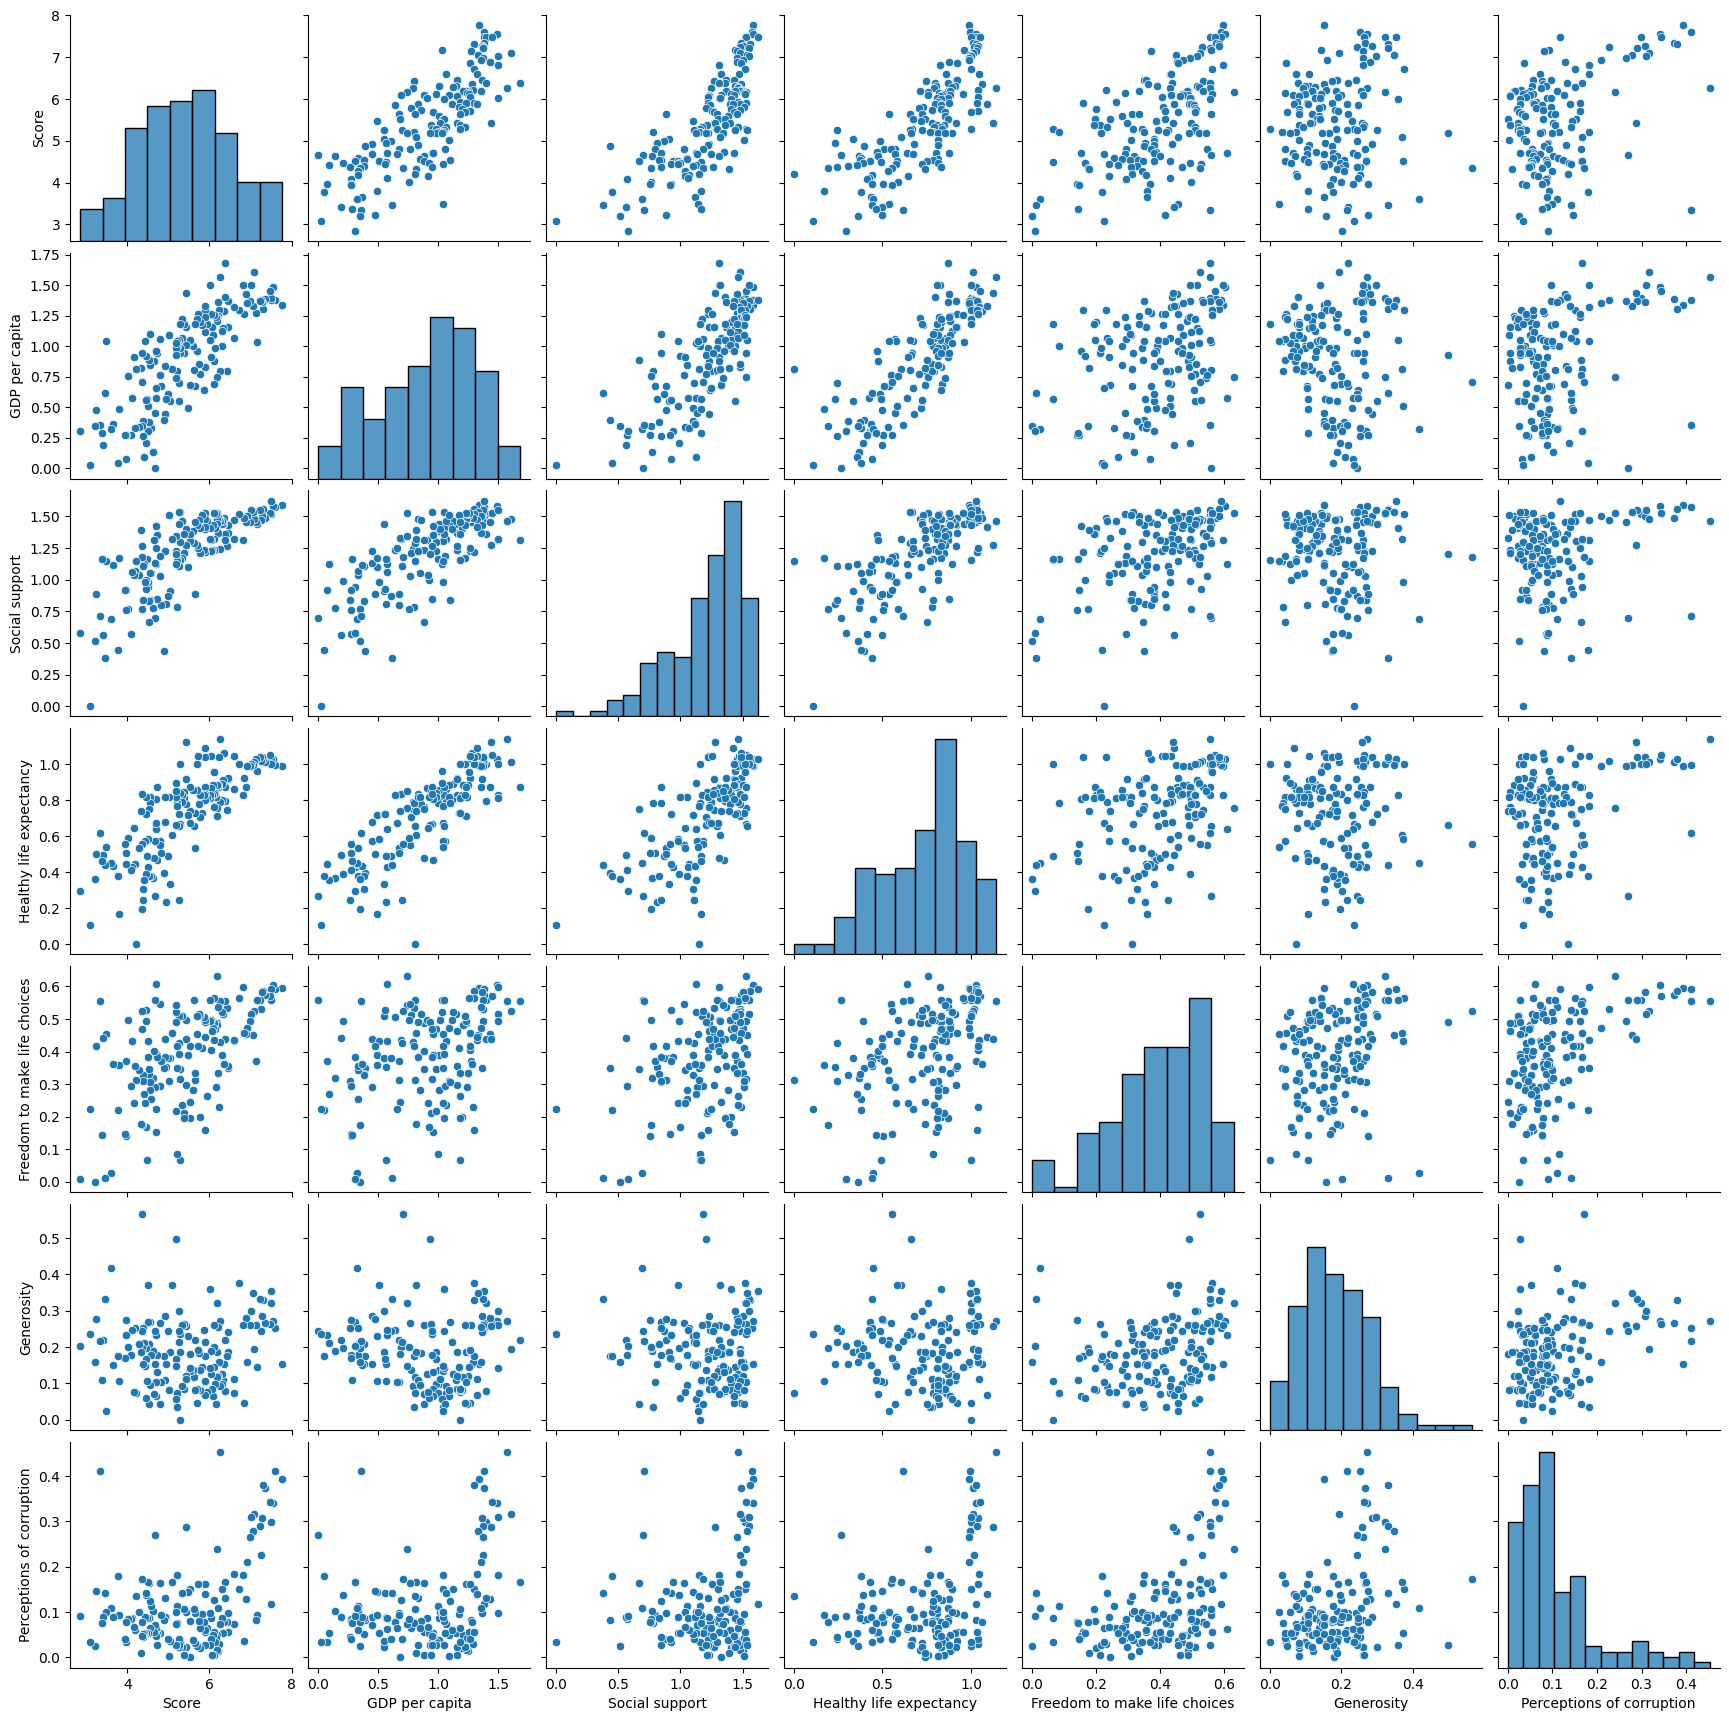

In [11]:
fig = plt.figure(figsize=(15,10))
sns.pairplot(df[["Score","GDP per capita","Social support", "Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]])

<ipython-input-12-d83ae4d14942>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-12-d83ae4d14942>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-12-d83ae4d14942>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

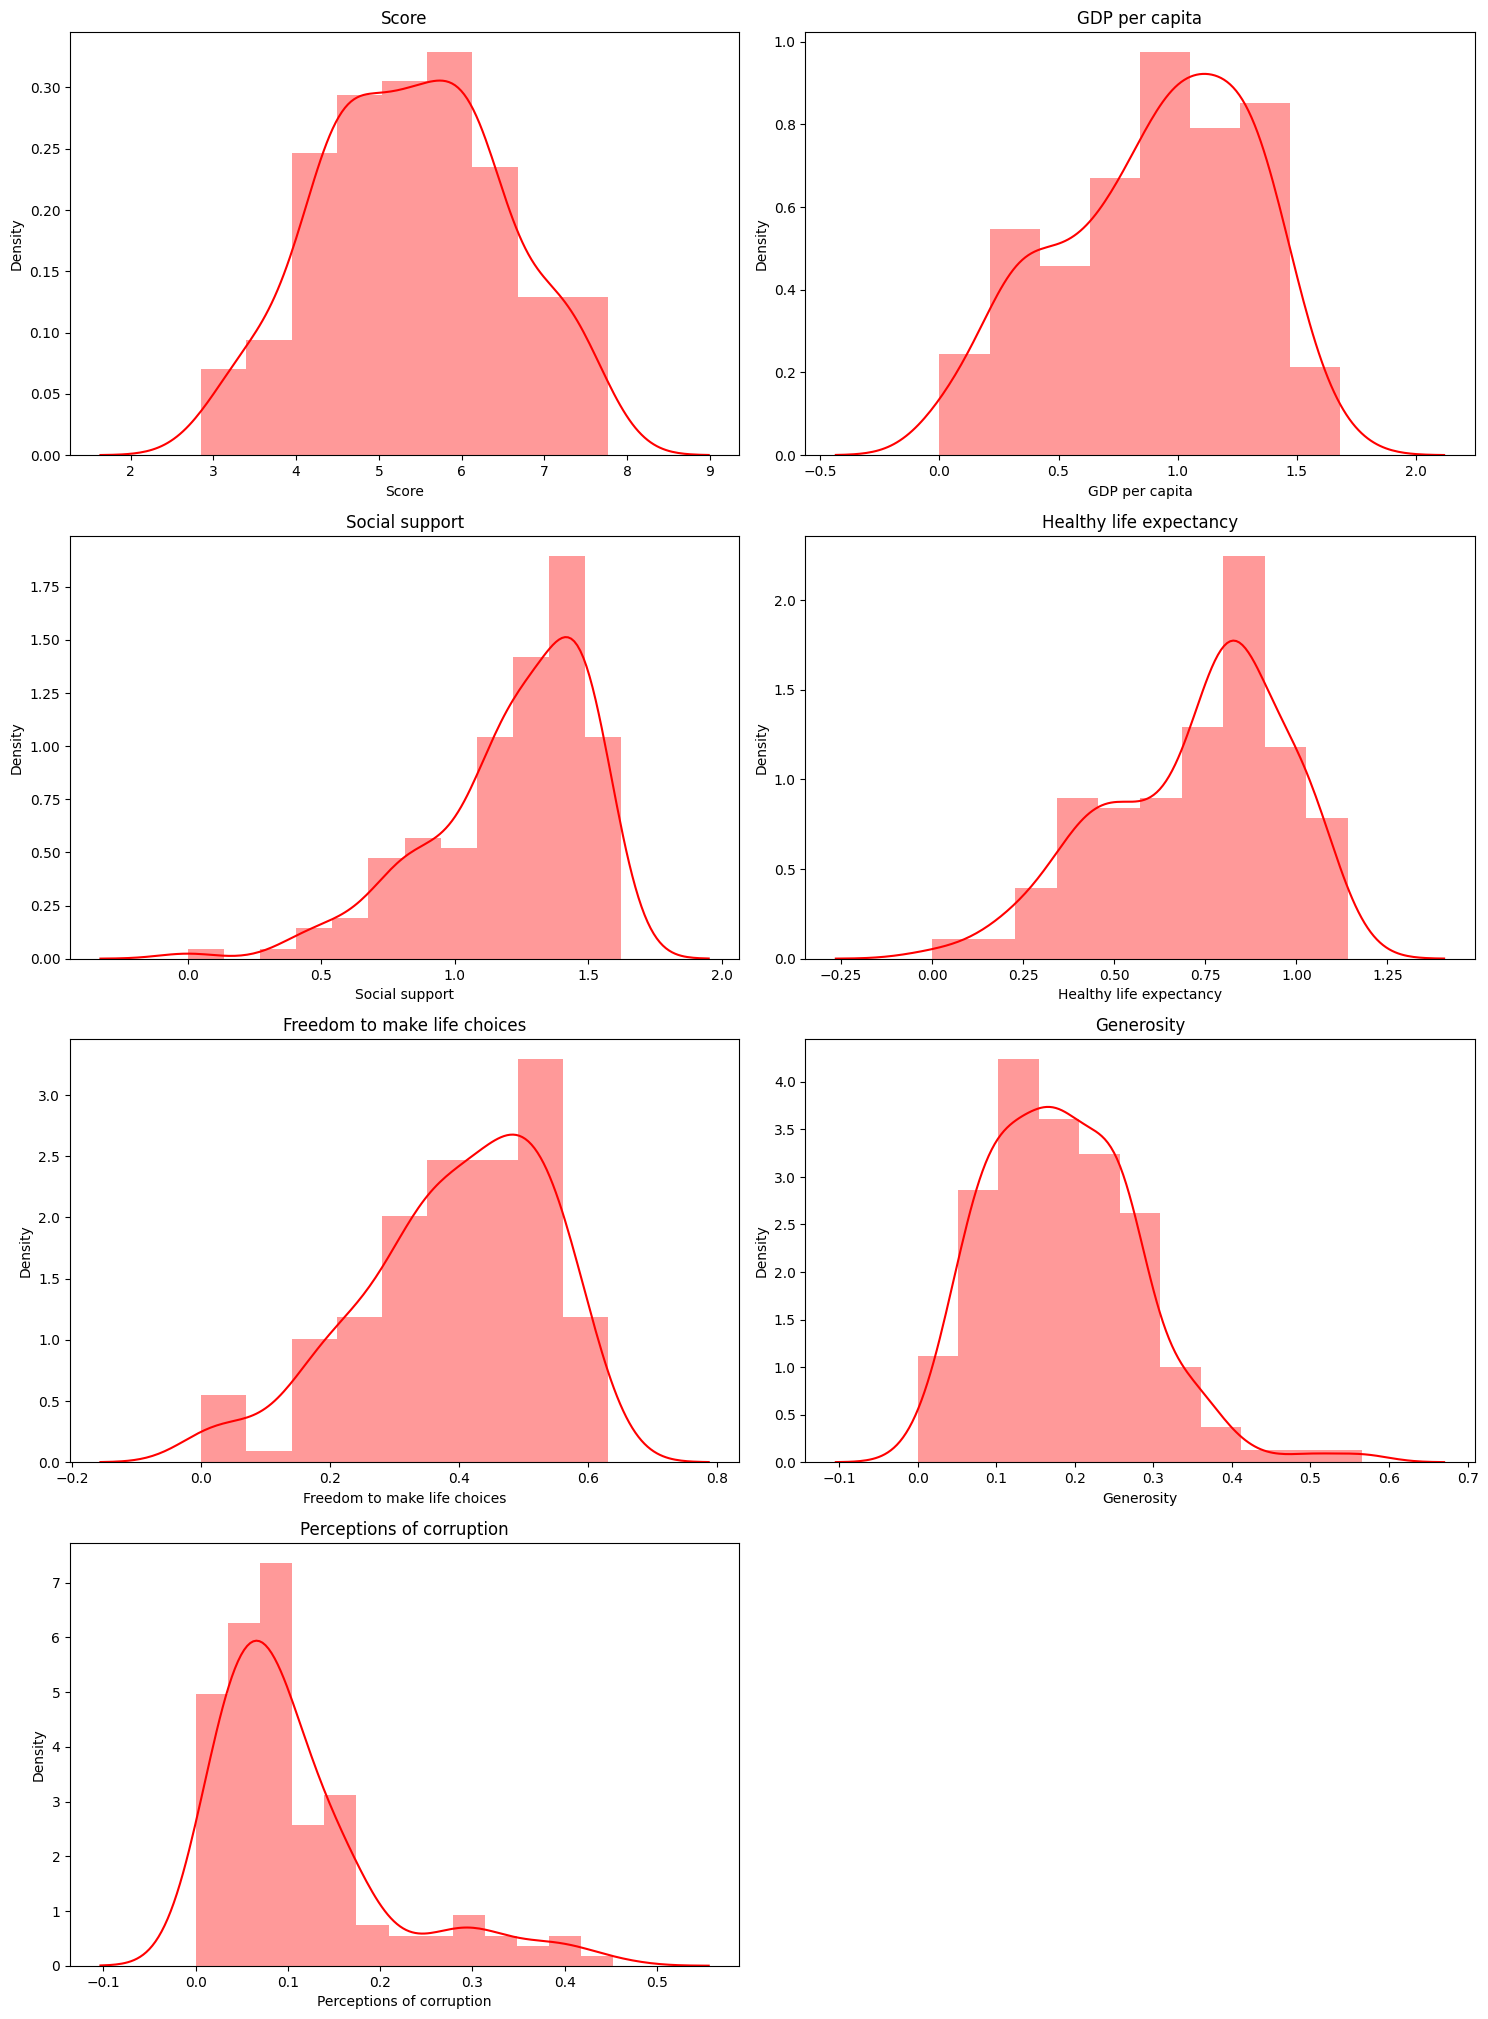

In [12]:
columns = ["Score","GDP per capita","Social support", "Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
plt.figure(figsize=(15,40))
for i in range(len(columns)):
  plt.subplot(8,2,i+1)
  sns.distplot(df[columns[i]], color = 'r')
  plt.title(columns[i])

plt.tight_layout()

# Data visualization - 2

In [13]:
fig = px.scatter(df, x="GDP per capita", y = "Score", text="Country or region")
fig


In [14]:
fig = px.scatter(df, x="GDP per capita", y = "Score", text="Country or region", color = 'Country or region')
fig.update_layout(title_text = "happiness score vs GDP per capita")
fig.show()

In [15]:
fig = px.scatter(df, x="Freedom to make life choices", y = "Score", size = "Overall rank", color = 'Country or region')
fig.update_layout(title_text = "Score vs Freedom to make choice")
fig.show()

In [16]:
fig = px.scatter(df, x="Healthy life expectancy", y = "Score", size = "Overall rank", color = 'Country or region')
fig.update_layout(title_text = "Score vs Healthy life expectancy")
fig.show()

# Prepare the data for cluster models

In [17]:
df_seg = df.drop(columns = ['Country or region', 'Overall rank','Score'])

In [18]:
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [19]:
#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)

# Finding the optimal number of K for our cluster model

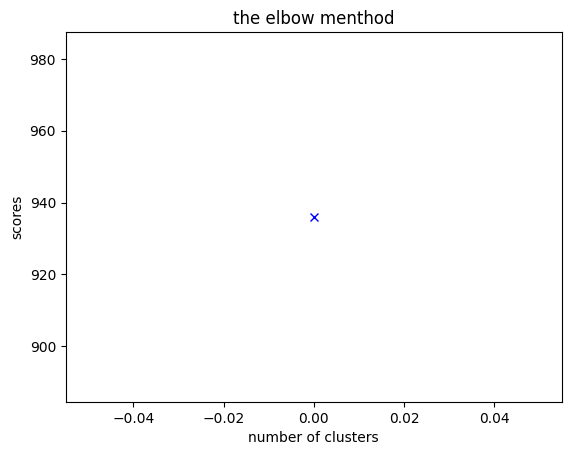

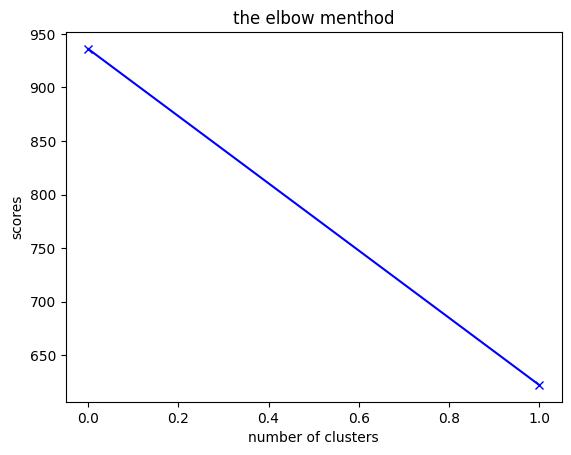

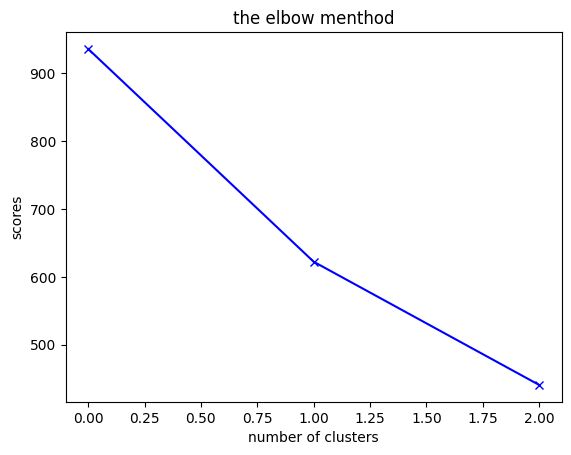

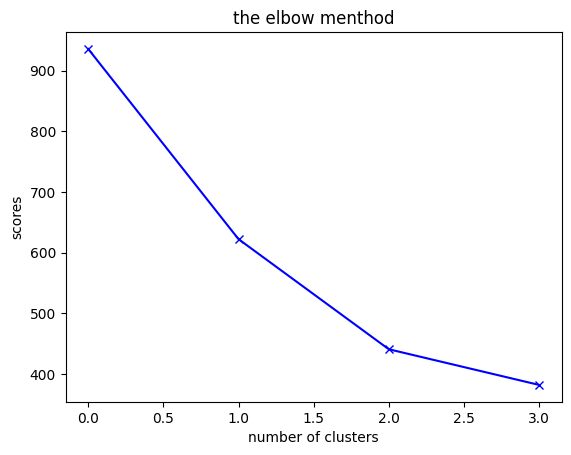

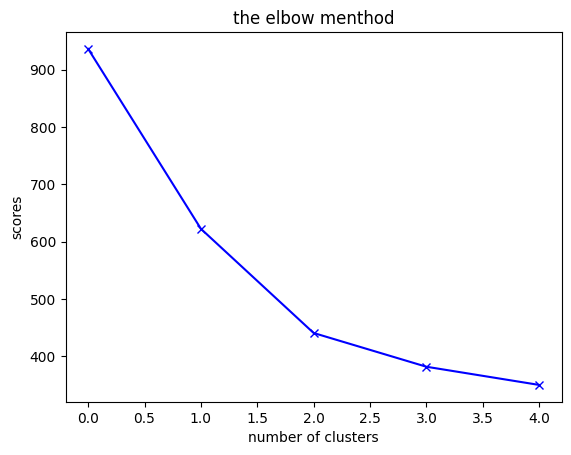

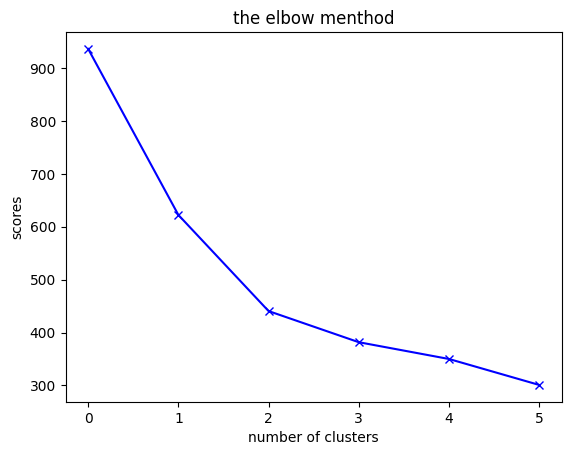

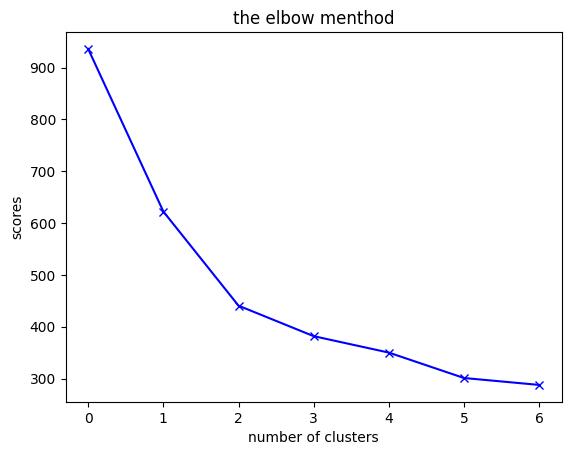

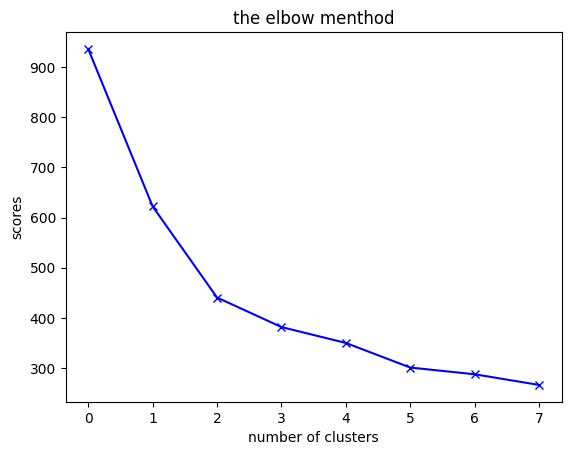

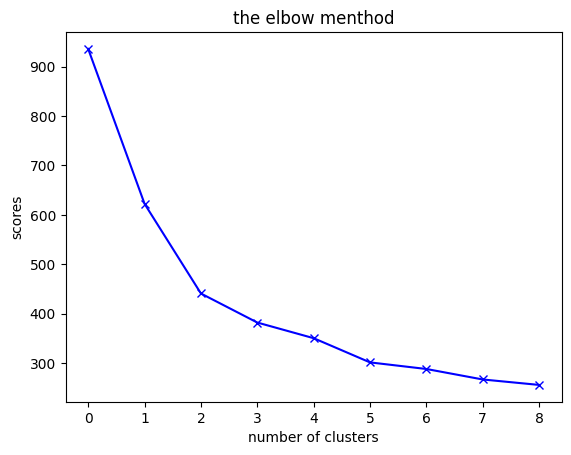

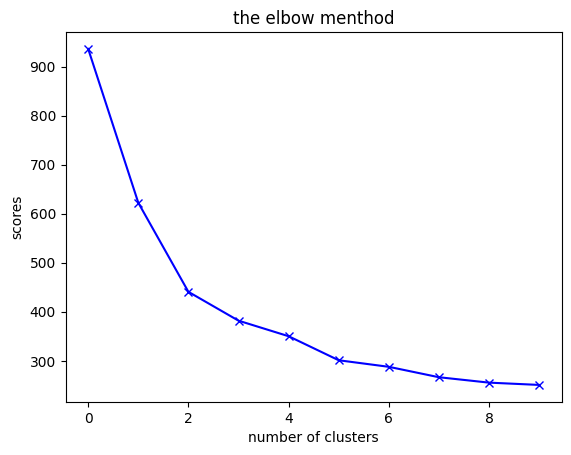

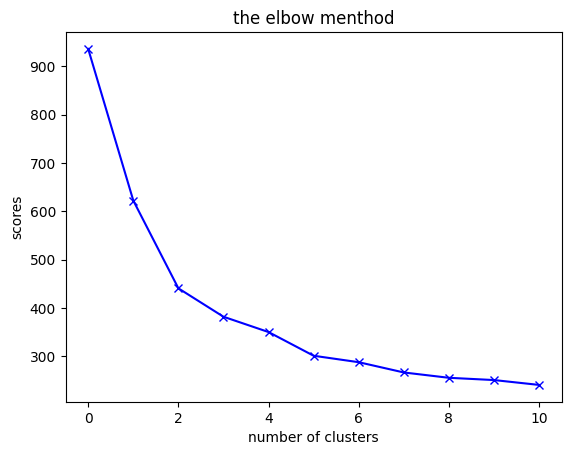

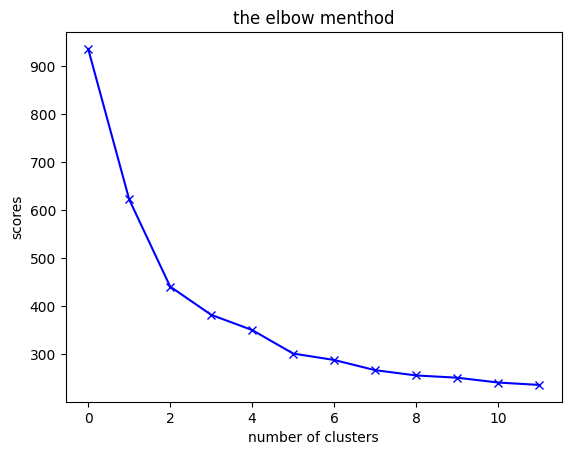

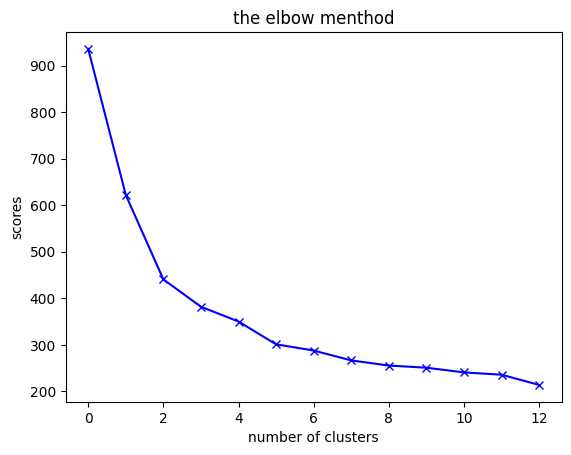

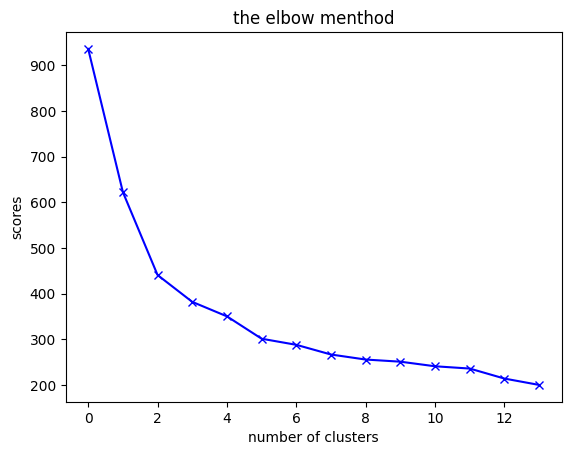

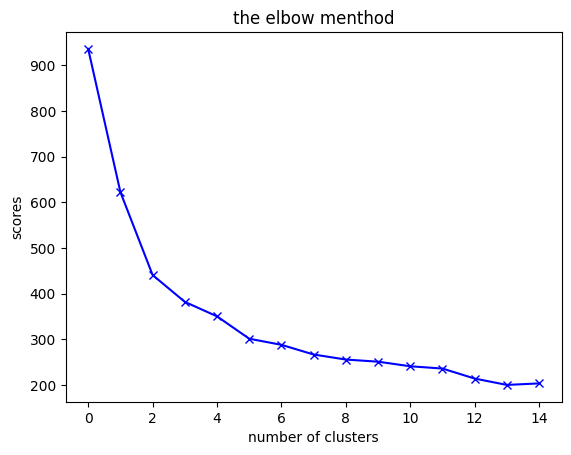

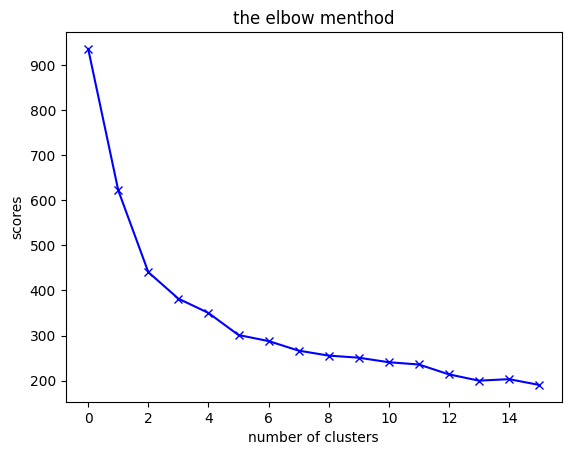

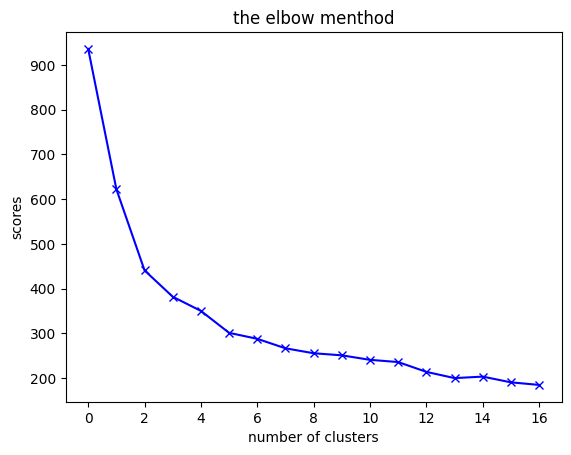

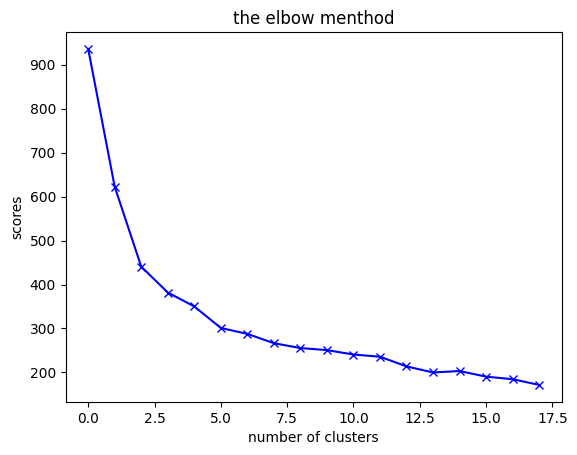

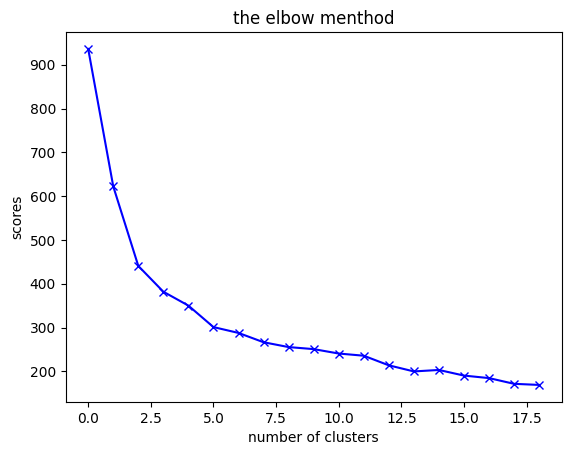

In [21]:
scores = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_)

  plt.plot(scores, 'bx-')
  plt.title("the elbow menthod")
  plt.xlabel('number of clusters')
  plt.ylabel('scores')
  plt.show()

# Applying K means

In [22]:
kmeans = KMeans(n_clusters = 4 )
kmeans.fit(scaled_data)


KMeans(n_clusters=4)

In [24]:
labels = kmeans.labels_

In [25]:
kmeans.cluster_centers_.shape

(4, 6)

In [26]:
kmeans.cluster_centers_

array([[ 1.06608246,  0.85876066,  0.91532325,  1.04136197,  1.19497794,
         1.615585  ],
       [ 0.26517599,  0.02993597,  0.28020841, -1.06074745, -0.79303675,
        -0.51233958],
       [ 0.37341979,  0.51620918,  0.42229722,  0.48597327, -0.34191467,
        -0.39305127],
       [-1.2835611 , -1.17380221, -1.26616392, -0.47547205,  0.28000045,
        -0.10238325]])

In [27]:
cluster = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.066082,0.858761,0.915323,1.041362,1.194978,1.615585
1,0.265176,0.029936,0.280208,-1.060747,-0.793037,-0.512340
2,0.373420,0.516209,0.422297,0.485973,-0.341915,-0.393051
3,-1.283561,-1.173802,-1.266164,-0.475472,0.280000,-0.102383


In [28]:
cluster = scaler.inverse_transform(cluster)
cluster = pd.DataFrame(data = cluster, columns = [df_seg.columns])
cluster

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.328500,1.464923,0.946154,0.541308,0.298308,0.262846
1,1.010452,1.217742,0.792871,0.241065,0.109548,0.062323
2,1.053436,1.362764,0.827164,0.461982,0.152382,0.073564
3,0.395432,0.858750,0.419659,0.324659,0.211432,0.100955


In [29]:
labels.shape

(156,)

In [30]:
labels.max()

3

In [31]:
labels.min()

0

In [33]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 0, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 3, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [34]:
#concate the cluster label to original dataframe

df = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3


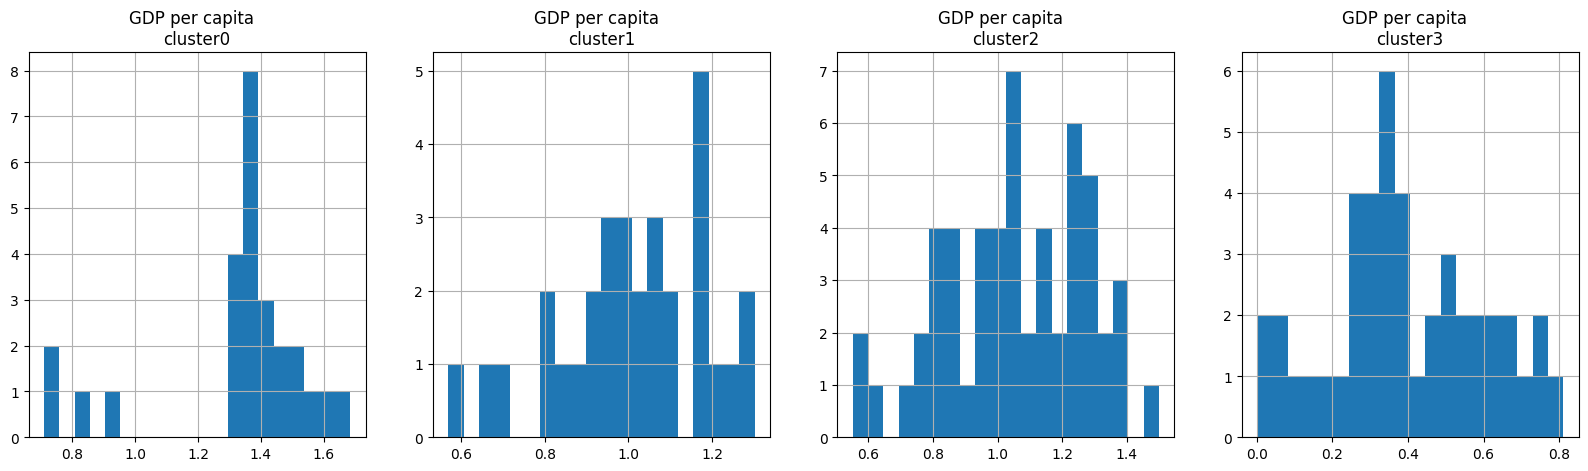

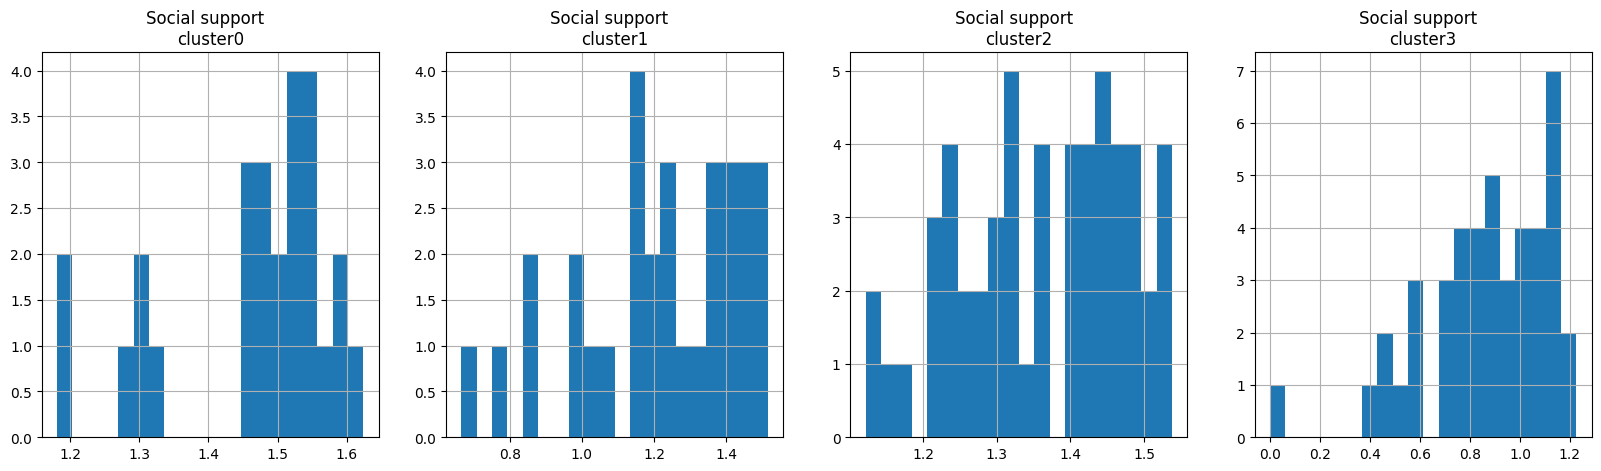

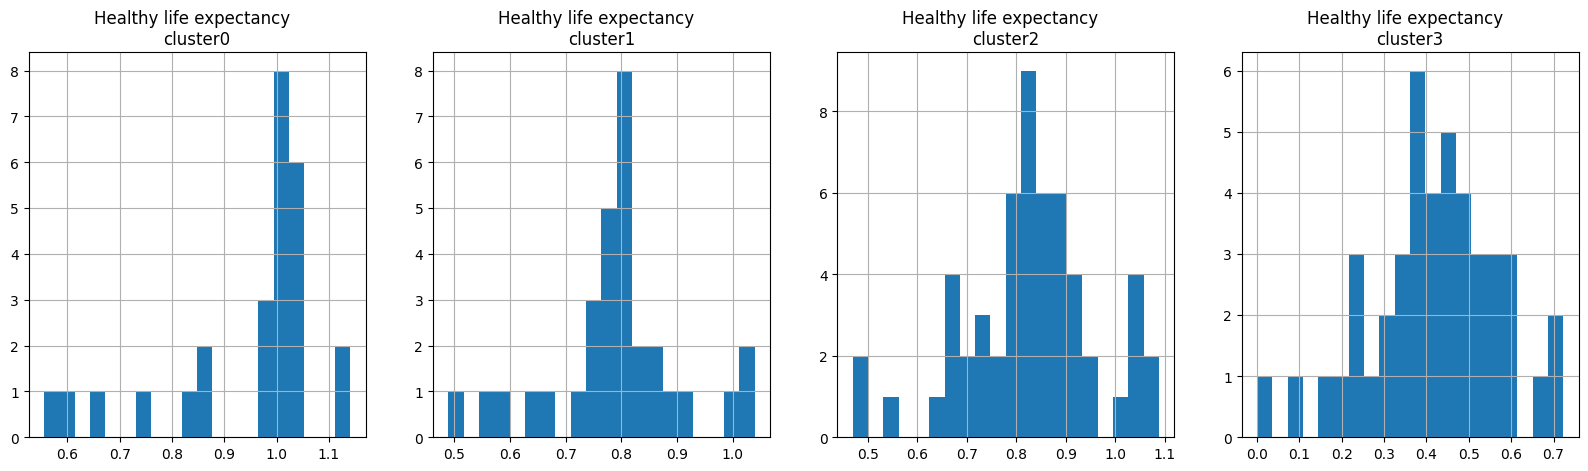

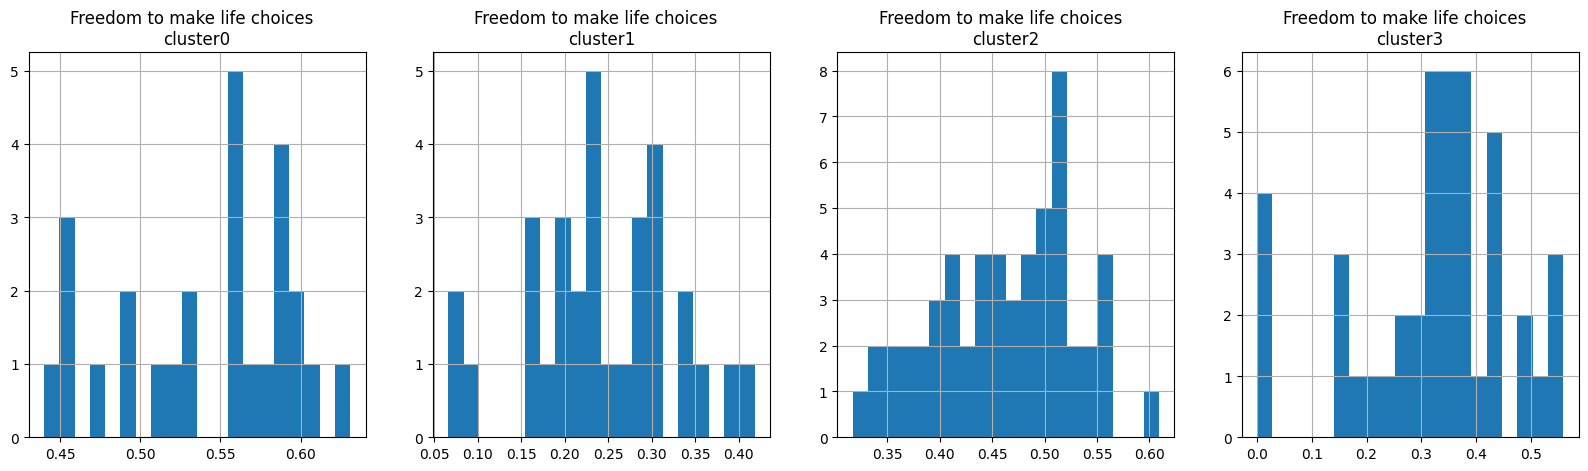

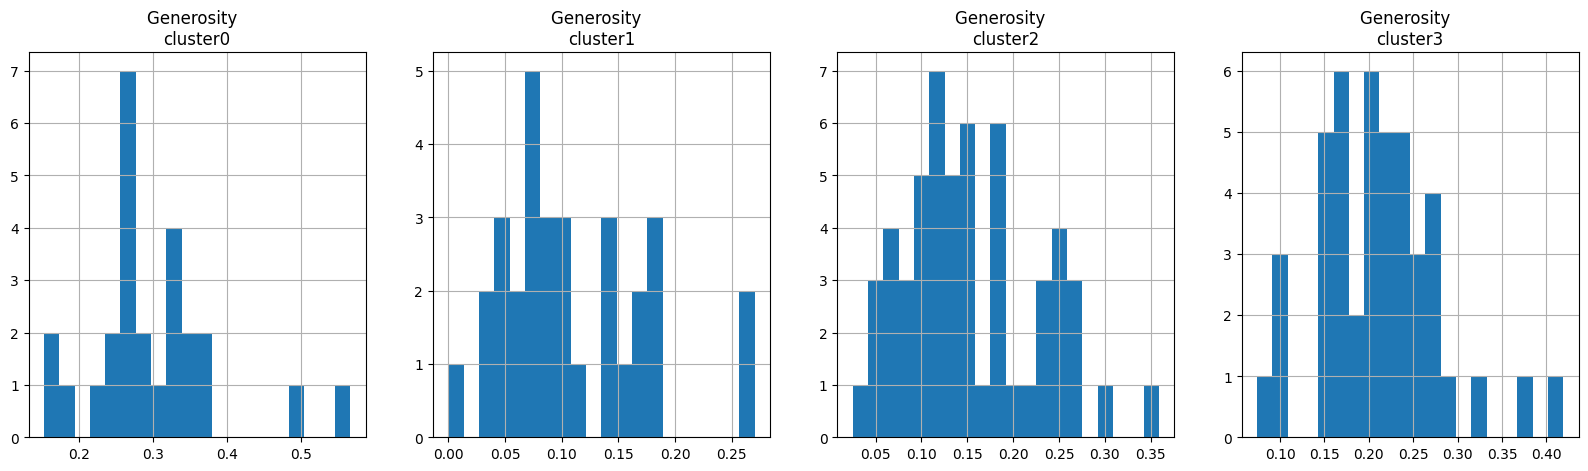

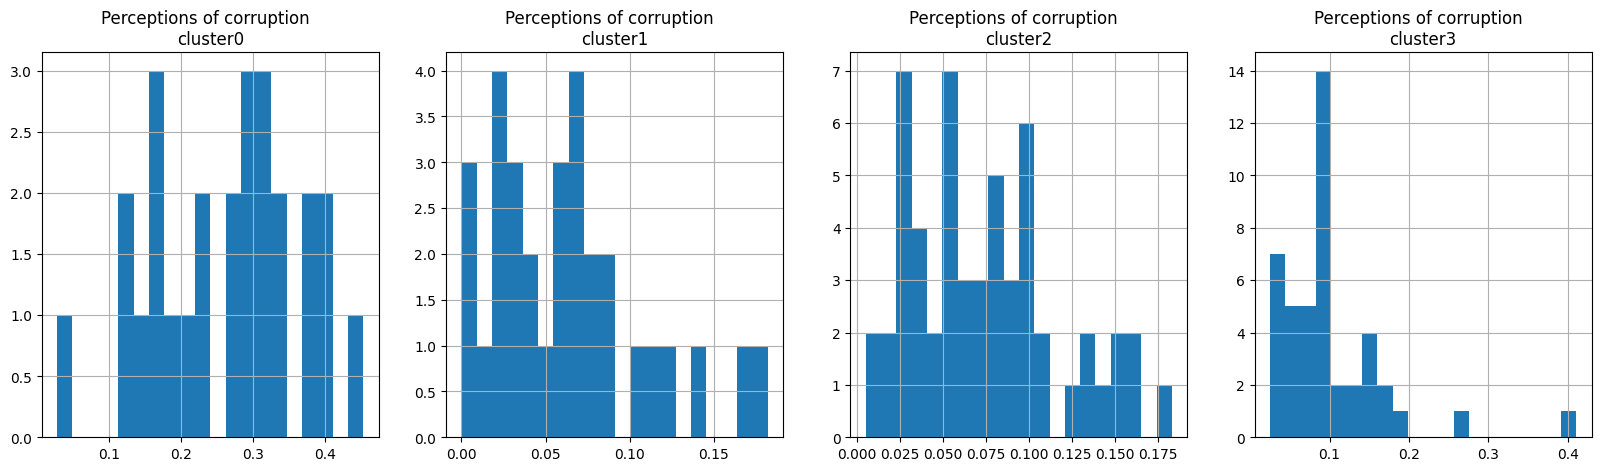

In [40]:
#plt histogram of various clusters

for i in df_seg.columns:
  plt.figure(figsize=(20,5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df[df['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{}  \ncluster{}'.format(i,j))

plt.show()

# Visualize the clusters

In [41]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3


In [42]:
#plt the relationship between cluster and score

fig = px.scatter(df, x='cluster', y='Score', size = 'Overall rank', color = 'Country or region', hover_name = 'Country or region',trendline = 'ols')
fig.update_layout(title_text = "Cluster vs Score")
fig.show()

In [46]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth',
           locations = df["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['cluster'],
           text = df["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)